<a href="https://colab.research.google.com/github/kalvelagem/MAT421/blob/main/Module_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 22.1
Differential equaiton - a relationship between a function, f(X), its independent variable, x and any number of its derivatives.

Ordinary differential equation (ODE) - a differential equation where the independent varibale, and therefore also the derivatives is in one dimension.

ODE can be written F(x,f(x), $\frac{df(x)}{x}$, $\frac{d^2f(x)}{dx^2}$, $\frac{d^3f(x)}{dx^3}$,..., $\frac{d^{n-1}f(x)}{dx^{n-1}}$ = $\frac{d^nf(x)}{dx^n}$

where F is an arbitrary function that incorporates one or all of the input arguments, and n is the order of the differential equation. This equation is referred to as an $n^{th}$ order ODE.

Partial differential equation (PDE) - a general form differential equation where x is a vector containing the independent variables $X_1, x_2, x_3,..., x_m$ and the partial derivatives can be of any order and with respect to any combination of variables.

Exampleof PDE with temperature:
$\frac{du(t,x,yz)}{dt}$ = α ($\frac{du(t,x,y,z)}{dx}$ + $\frac{du(t,x,y,z)}{dy}$ +$\frac{du(t,x,y,z)}{dz}$)

General solution to a differential equation - a g(x) that satisfies the differential equation. Although there are usually many solutions to a differential equation, they are still hard to find. 

Particular solution - a p(x) that satisfies the differential equation and n explicitly known values of the solution, or its derivatives, at certain points. 

Solution - generally stated, p(x) must satisfy the differential equation and $p^{(j)}(x_i) = p_i$, where $p^{(j)}$ is the $j^{th} derivative of p, for n triplets (j, $x_i$, $p_i$)

Inital value - a common set of known values for an ODE solution. For an ODE of order n, the inital values is a known value for the $0^{th}$ to $(n-1)^{th}$ derivatives at x = 0, f(0), $f^{(1)}(0)$, $f^{(2)}(0)$,..., $f^{(n-1)}(0)$.

Inital value problem - finding a solution to an ODE given an inital value

#Section 22.2
Many numerical methods for solving inital value problems are designed specfically to solve first-roder differential equations. To make these solvers useful for solving higher order differential equation, we must often reduce the order of the differential equation to first order. 

To reduce the order of a differential equation, consider a vector S(t), which is the state of the system as a function of time.

The state of a system - a collection of all the dependent variables that are relevant to the behavior of the system.

Linear ODEs: $\frac{dS(t)}{dt}$ = [0 1; -$\frac{g}{l}$ 0] S(t)

# Section 22.3
Let $\frac{dS(t)}{dt} = F(t, S(t)) be an explicitly defined first order ODE 

F is a function that returns the derivative, or change, of a state given time and state value. Also let t be a numerical grid of the interval $[t_0,t_f]$ with spacing h. Without loss of generality, we assume that $t_0 = 0$, and that $t_f = Nh$ for some positive integer, N.

Linear approximation of S(t) around $t_j$ at $t_{j+1}$ is S$(t_{j+1})$ = S$(t_j)$ + $(t_{j+1} - t_j)$$\frac{dS(t_j)}{dt}$ which can also be written $S(t_{j+1}) = S(t_j) + hF(t_j,S(t_j))$

Explicit Euler Formula - it allows us to compute an approximation for the state at $S(t_{j+1})$ given the state at $S(t_j)$. Starting from a given initial value of $S_0 = S(t_0)$, we can use this formula to integrate the states up to $S(t_f)$; these S(t) values are then an approximation for the solution of the differential equation.

Explicit Euler formula - the simplest and most intuitive method for solving inital value problems. Distance of h.

We can compute $S(t_j)$ for every $t_j$ using the following steps.


*   Store $S_0 = S(t_0)$ in an array, S
*   Compute $S(t_1) = S_0 + hF(t_0,S_0)$
*   Store $S(t_1)$ = $S_0$ _ hF$(t_0,S_0)$
*   Compute $S(t_2) = S_1 + hF(t_1,S_1)$
*   Store $S_2 = S(T_1)$ in S
*   ...
*   Compute $S(t_f) = S_{f-1} + hF(t_{f-1},S_{t-1})$
*   Store $S_f = S(t_f) in S.
*   S in an approximation of the solution to the inital value problem

When using a method with this structure, we say the method integrates the solution of the ODE.











<ipython-input-1-53e864c3c24f>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


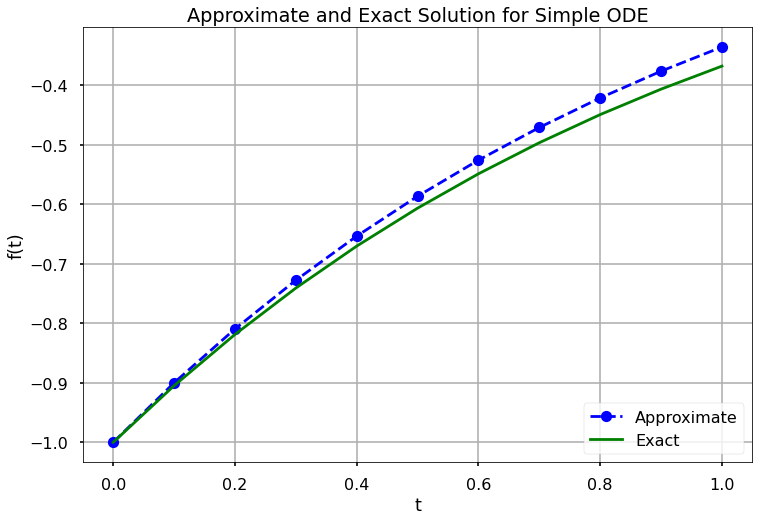

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

# Define parameters
f = lambda t, s: np.exp(-t) # ODE
h = 0.1 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

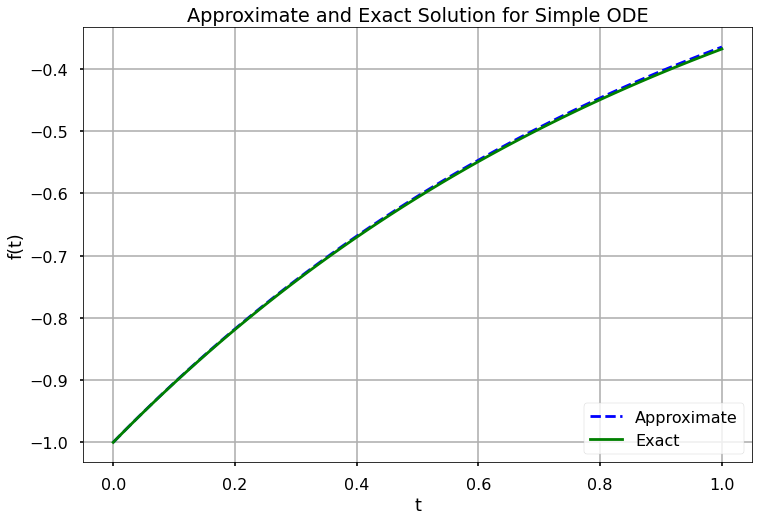

In [2]:
h = 0.01 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'b--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Implicit Euler Formula can be derived by taking the linear approximation of S(t) around $t_{j+t}$ and computing it at $t_j$: $S(t_{j+1}) = S(t_j) + hF(t_{j+1}, S(t_{j+1})$

Another implicit formula is Trapezoidal Formula - the average of the Explicit nad Implicit Euler Formulas: $S(t_{j+1}) = S(t_j) + $\frac{h}{2}(F(t_j,S(t_j)) + F(t_{j+1}, S(t_{j+1}))).